# Welcome to OnSSET

This notebook has been designed by KTH dESA in order to run the Open Source Spatial Electrification Tool (OnSSET) in few descernible steps. Using this Notebook and the onsset.py code, the user can access any part of the code behind the tool and modify it according to his/her preferences. 

For any further questions or clarification please refer to the tool's <a href="http://onsset-manual.readthedocs.io/en/latest/index.html" target="_blank">Manual</a>, or ask any of the worhshop instructors. Enjoy!

# Initial inputs

Before we proceed, please choose a country for the analysis, as well as the start and end year of the modelling period and some other general inputs. 


In [18]:
country = 'Malawi'   ### Simply write the name of the selected country within the brackets

start_year = 2018
end_year = 2030

from onsset import *

coordinate_units = 1000  # 1000 if coordinates are in m, 1 if coordinates are in km
discount_rate = 0.08

# Electrification targets

Next, define the electrification targets for the end year, as well as potential intermediate targets

In [19]:
### Example: The below will run the analysis in two steps. From 2018 to 2023, and then 2023 to 2030.
### The electrification target in 2023 is 80% (0.8) and in 2030 is 100% (1).
### Finally, the length of the first step is 5 years and the second step is 7 years.
yearsofanalysis = [2023, 2030]
eleclimits = {2023: 0.8, 2030: 1}
time_steps = {2023: 5, 2030: 7}

# Step 1 and 2. GIS data collection, processing and import

OnSSET is a GIS based tool and its proper function depends heavily on the diligent preparation and calibration of the necessary geospatial data. Documentation on GIS processing in regards to OnSSET can be found <a href="http://onsset-manual.readthedocs.io/en/latest/data_acquisition.html" target="_blank">here</a>.

Before you proceed, please make sure that the .csv file containing all the appropriate input data is properly created and uploaded on OnSSET.org space.

**Note!** The .csv file shall be named after the country selected for the analysis (e.g. Ghana.csv or Madagascar.csv).

In [20]:
onsseter = SettlementProcessor('{x}.csv'.format(x = country))

onsseter.condition_df(country)

display(Markdown('#### The {c}.csv file has been imported correctly. Here is a preview:'.format(c=country)))
display(onsseter.df[['Country','Pop','NightLights','TravelHours','GHI','WindVel','Hydropower','HydropowerDist']].sample(7))


2019-04-12 12:03:51,764		Ensure that columns that are supposed to be numeric are numeric
2019-04-12 12:03:51,797		Add column with country name
2019-04-12 12:03:51,800		Adding column "ElectrificationOrder"
2019-04-12 12:03:51,802		Replace null values with zero
2019-04-12 12:03:51,836		Sort by country, Y and X


#### The Malawi.csv file has been imported correctly. Here is a preview:

,Country,Pop,NightLights,TravelHours,GHI,WindVel,Hydropower,HydropowerDist
1322,Malawi,81.07094,0.00000,1.36667,2034,4.89261,221,40.12344
132035,Malawi,4.24236,0.00000,1.48333,1990,3.32294,193,41.36674
68029,Malawi,38.04987,0.00000,1.75000,2092,4.52593,265,11.59964
4207,Malawi,12.09994,0.00000,2.00000,2086,4.70861,221,43.46041
133313,Malawi,5.90520,0.00000,1.65000,1953,3.97807,193,38.68776
157518,Malawi,34.27693,0.10385,0.95000,2031,3.87977,146,0.86032
180193,Malawi,7.37974,0.00000,1.06667,2007,3.78097,375,38.40082


In [21]:
pop_threshold = 0  # If you wish to remove low density population cells, enter a threshold above 0
onsseter.df = onsseter.df.loc[onsseter.df[SET_POP] > pop_threshold]

# Step 3. Enter country specific data

In addition to the GIS data (see Step 1 and 2) the user should define and insert into the model crucial information describing the social - economic - technological environment in the selected country. 

**Note!** Most input values shall represent future estimates for the variable they describe and **NOT** current values.

# a. Demographics and Social components

In [22]:
pop_start_year = 83000000       ### Write the population in the base year (e.g. 2016) 
pop_end_year_high = 92000000        ### Write the projected population in the end year (e.g. 2030)
pop_end_year_low = 90000000

urban_ratio_start_year = 0.44    ### Write the urban population population ratio in the base year (e.g. 2016)
urban_ratio_end_year = 0.47    ### Write the urban population population ratio in the end year (e.g. 2030)

num_people_per_hh_urban = 3    ### Write the number of people per household expected in the end year (e.g. 2030)
num_people_per_hh_rural = 3.6    ### Write the number of people per household expected in the end year (e.g. 2030)

elec_ratio_start_year = 0.171        ### Write the electrification rate in the base year (e.g. 2016)
urban_elec_ratio = 0.472             ### Write urban electrification rate in the base year (e.g. 2016)
rural_elec_ratio = 0.0              ### Write rural electrification rate in the base year (e.g. 2016)

onsseter.grid_penalties()
onsseter.calc_wind_cfs()
onsseter.calibrate_pop_and_urban(pop_start_year, pop_end_year_high, pop_end_year_low, urban_ratio_start_year, 
                                 urban_ratio_end_year, start_year, end_year)

2019-04-12 12:03:52,092		Classify road dist
2019-04-12 12:03:55,043		Classify substation dist
2019-04-12 12:03:57,959		Classify land cover
2019-04-12 12:04:00,550		Classify elevation
2019-04-12 12:04:03,032		Classify slope
2019-04-12 12:04:05,596		Combined classification
2019-04-12 12:04:05,607		Grid penalty
2019-04-12 12:04:08,255		Calculate Wind CF
2019-04-12 12:04:15,711		Calibrate current population
2019-04-12 12:04:19,176		Project future population


0.4334863291458491

# b. Technology specifications & costs

The cell below contains all the information that is used to calculate the levelised costs for all the technologies, including grid. These should be updated to reflect the most accurate values. The following values are provided by KTH dESA, based on OSeMOSYS, the open source optimization model for long-run integrated assessment and energy planning.

In [23]:
grid_generation_cost = 0.05           ### This is the grid cost electricity USD/kWh as expected in the end year of the analysis
grid_power_plants_capital_cost = 2000 ### The cost in USD/kW to for capacity upgrades of the grid
grid_losses = 0.1                     ### The fraction of electricity lost in transmission and distribution (percentage) 
base_to_peak = 0.5                    ### The ratio of base grid demand to peak demand (percentage) 
existing_grid_cost_ratio = 0.1        ### The additional cost per round of electrification (percentage) 

In [24]:
diesel_price = 1.7                   ### This is the diesel price in USD/liter as expected in the end year of the analysis

In [25]:
sa_diesel_capital_cost = 938          ### Stand-alone Diesel capital cost (USD/kW) as expected in the years of the analysis
mg_diesel_capital_cost = 721          ### Mini-grid Diesel capital cost (USD/kW) as expected in the years of the analysis
mg_pv_capital_cost = 4300             ### Mini-grid PV capital cost (USD/kW) as expected in the years of the analysis
mg_wind_capital_cost = 3000           ### Mini-grid Wind capital cost (USD/kW) as expected in the years of the analysis
mg_hydro_capital_cost = 5000          ### Mini-grid Hydro capital cost (USD/kW) as expected in the years of the analysis

In [26]:
sa_pv_capital_cost_1 = 20000          ### Stand-alone PV capital cost (USD/kW) for household systems under 20 W
sa_pv_capital_cost_2 = 11050          ### Stand-alone PV capital cost (USD/kW) for household systems between 21-50 W
sa_pv_capital_cost_3 = 7660           ### Stand-alone PV capital cost (USD/kW) for household systems between 51-100 W
sa_pv_capital_cost_4 = 5780           ### Stand-alone PV capital cost (USD/kW) for household systems between 101-200 W
sa_pv_capital_cost_5 = 5070           ### Stand-alone PV capital cost (USD/kW) for household systems over 200 W

The cells below contain additional technology specifications

In [27]:
# Transmission and distribution costs
mv_line_cost = 9000
lv_line_cost=5000
mv_line_capacity=50
lv_line_capacity=10
lv_line_max_length=30
hv_line_cost=53000
mv_line_max_length=50
hv_lv_transformer_cost=5000
mv_increase_rate=0.1
max_mv_line_dist = 50


# Centralized grid costs
grid_calc = Technology(om_of_td_lines=0.1,
                        distribution_losses=grid_losses,
                        connection_cost_per_hh=150,
                        base_to_peak_load_ratio=base_to_peak,
                        capacity_factor=1,
                        tech_life=30,
                        grid_capacity_investment=grid_power_plants_capital_cost,
                        grid_price=grid_generation_cost)

# Mini-grid hydro costs
mg_hydro_calc = Technology(om_of_td_lines=0.03,
                            distribution_losses=0.05,
                            connection_cost_per_hh=100,
                            base_to_peak_load_ratio=0.9,
                            capacity_factor=0.5,
                            tech_life=30,
                            capital_cost=5000,
                            om_costs=0.02,
                            )

# Mini-grid wind costs
mg_wind_calc = Technology(om_of_td_lines=0.03,
                            distribution_losses=0.05,
                            connection_cost_per_hh=100,
                            base_to_peak_load_ratio=0.9,
                            capital_cost=3500,
                            om_costs=0.02,
                            tech_life=20,
                            )

# Mini-grid PV costs
mg_pv_calc = Technology(om_of_td_lines=0.03,
                        distribution_losses=0.05,
                        connection_cost_per_hh=100,
                        base_to_peak_load_ratio=0.9,
                        tech_life=20,
                        om_costs=0.02,
                        capital_cost=4300                        
                       )

# Stand-alone PV costs
sa_pv_calc = Technology(base_to_peak_load_ratio=0.9,
                        tech_life=15,
                        om_costs=0.02,
                        capital_cost={0.020: sa_pv_capital_cost_1, 
                                      0.050: sa_pv_capital_cost_2, 
                                      0.100: sa_pv_capital_cost_3, 
                                      0.200: sa_pv_capital_cost_4, 
                                      0.300: sa_pv_capital_cost_5},
                        standalone=True
                        )

# Mini-grid diesel costs
mg_diesel_calc = Technology(om_of_td_lines=0.03,
                            distribution_losses=0.05,
                            connection_cost_per_hh=100,
                            base_to_peak_load_ratio=0.9,
                            capacity_factor=0.7,
                            tech_life=15,
                            om_costs=0.1,
                            efficiency=0.33,
                            capital_cost=721,
                            diesel_price=diesel_price,
                            diesel_truck_consumption=33.7,
                            diesel_truck_volume=15000,
                            )

# Stand-alone diesel costs
sa_diesel_calc = Technology(base_to_peak_load_ratio=0.9,
                            capacity_factor=0.7,
                            tech_life=10,
                            om_costs=0.1,
                            capital_cost=938,
                            diesel_price=diesel_price,
                            standalone=True,
                            efficiency=0.28,
                            diesel_truck_consumption=14,
                            diesel_truck_volume=300)

# Step 4. Data Processing, Projection and Calibration

Based on the input data in the previous steps, the code now creates some additional layers that are useful for the electrification analysis. This is an iterative process and requires calibration from the user. 

To illustrate, one of the most important steps in the electrification analysis is the identification of the currently electrified settlements. Based on their location, the model then decides how easy is to extend the grid to neighboring cells or rather choose and off-grid technology.

### Here is an example
#### The user will need to calibrate the model so that the modelled electrification rate is equal (or close) to the actual rate in the selected country.

First, set the minimum night light intensity, below which it is assumed there is no electricity access

In [28]:
min_night_lights = 0    ### 0 Indicates no night light, while any number above refers to the night-lights intensity

In addition, both of the below conditions must be met to consider a settlement electrified

In [29]:
min_pop = 50      ### Settlement above which we can assume that it could be electrified

max_service_transformer_distance = 2    ### Distance from the existing grid network below which we can assume a settlement could be electrified
max_mv_line_distance = 2
max_hv_line_distance = 5

In [30]:
Technology.set_default_values(base_year=start_year, start_year=start_year, end_year=end_year, discount_rate=discount_rate)

elec_modelled, urban_internal_elec_ratio, rural_internal_elec_ratio = onsseter.elec_current_and_future(elec_ratio_start_year, 
                                                                                                       urban_elec_ratio, 
                                                                                                       rural_elec_ratio, 
                                                                                                       pop_start_year, 
                                                                                                       start_year,
                                                                                                       min_night_lights=min_night_lights, 
                                                                                                       min_pop=min_pop, 
                                                                                                       max_transformer_dist=max_service_transformer_distance, 
                                                                                                       max_mv_dist=max_mv_line_distance, 
                                                                                                       max_hv_dist=max_hv_line_distance) 

onsseter.grid_reach_estimate(start_year, gridspeed=9999)

2019-04-12 12:04:39,432		Calibrate current electrification
C:\GitHub\The-GEP\onsset.py:1198: RuntimeWarning: divide by zero encountered in double_scalars
  rural_elec_factor = rural_elec_modelled / rural_electrified


We have identified the existence of transformers or MV lines as input data; therefore we proceed using those for the calibration
The modelled electrification rate achieved is 0.17.Urban elec. rate is 0.39 and Rural elec. rate is 0.00. 
If this is not acceptable please revise this part of the algorithm


<Figure size 720x720 with 0 Axes>

2019-04-12 12:05:02,396		update_title_pos
2019-04-12 12:05:02,487		update_title_pos
2019-04-12 12:05:02,576		update_title_pos
2019-04-12 12:05:02,618		update_title_pos
2019-04-12 12:05:02,642		update_title_pos


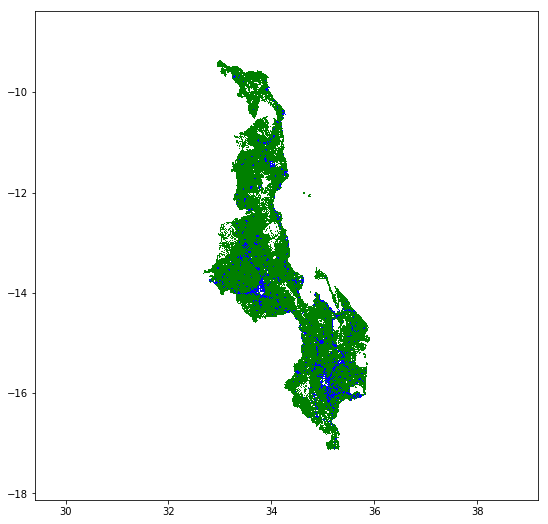

<Figure size 720x720 with 0 Axes>

In [31]:
from matplotlib import pyplot as plt
colors = ['#73B2FF','#EDD100','#EDA800','#1F6600','#98E600','#70A800','#1FA800']
plt.figure(figsize=(9,9))
plt.plot(onsseter.df.loc[onsseter.df[SET_ELEC_CURRENT]==0, SET_X_DEG], onsseter.df.loc[onsseter.df[SET_ELEC_CURRENT]==0, SET_Y_DEG], 'g,')
plt.plot(onsseter.df.loc[onsseter.df[SET_ELEC_CURRENT]==1, SET_X_DEG], onsseter.df.loc[onsseter.df[SET_ELEC_CURRENT]==1, SET_Y_DEG], 'b,')
if onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min() > onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min():
    plt.xlim(onsseter.df[SET_X_DEG].min() - 1, onsseter.df[SET_X_DEG].max() + 1)
    plt.ylim((onsseter.df[SET_Y_DEG].min()+onsseter.df[SET_Y_DEG].max())/2 - 0.5*abs(onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min()) - 1, (onsseter.df[SET_Y_DEG].min()+onsseter.df[SET_Y_DEG].max())/2 + 0.5*abs(onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min()) + 1)
else:
    plt.xlim((onsseter.df[SET_X_DEG].min()+onsseter.df[SET_X_DEG].max())/2 - 0.5*abs(onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min()) - 1, (onsseter.df[SET_X_DEG].min()+onsseter.df[SET_X_DEG].max())/2 + 0.5*abs(onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min()) + 1)
    plt.ylim(onsseter.df[SET_Y_DEG].min() -1, onsseter.df[SET_Y_DEG].max() +1)
plt.figure(figsize=(10,10))

# Step 5. Define the demand

This piece of code defines the target electricity demand in the region/country. Residential electricity demand is defined as kWh/household/year, while all other demands are defined as kWh/capita/year. Note that at the moment, all productive uses demands are set to 0 by default.

In [32]:
# Define the annual household electricity targets to choose from
tier_1 = 38.7  # 38.7 refers to kWh/household/year. 
tier_2 = 219
tier_3 = 803
tier_4 = 2117
tier_5 = 2993

onsseter.prepare_wtf_tier_columns(num_people_per_hh_rural, num_people_per_hh_urban, tier_1, tier_2, tier_3, tier_4, tier_5)

2019-04-12 12:05:02,725		Populate ResidentialDemandTier columns


In [33]:
onsseter.df[SET_EDU_DEMAND] = 0           # Demand for educational facilities (kWh/capita/year)
onsseter.df[SET_HEALTH_DEMAND] = 0        # Demand for health facilities (kWh/capita/year)
onsseter.df[SET_COMMERCIAL_DEMAND] = 0    # Demand for commercial activities (kWh/capita/year)
onsseter.df[SET_AGRI_DEMAND] = 0          # Demand for agricultural activities (kWh/capita/year)

# Step 6. Calculate and compare technology costs for every settlement in the country

Based on the previous calculation this piece of code identifies the LCoE that every off-grid technology can provide, for each single populated settlement of the selected country. The cell then takes all the currently grid-connected points in the country, and looks at the points within a certain distance from them, to see if it is more ecnomical to connect them to the grid, or to use one of the off-grid technologies calculated above. Once more points are connected to the grid, the process is repeated, so that new points close to those points might also be connected. This is repeated until there are no new points to connect to the grid.

In [34]:
urban_tier = 5     ###  According to the MTF. The tiers in kWh/person/year (examples for Tier 1-5 are 8, 44, 160, 423, 598)
rural_tier = 2     ###  According to the MTF. The tiers in kWh/person/year (examples for Tier 1-5 are 8, 44, 160, 423, 598)

In [35]:
annual_grid_cap_gen_limit = 400 # This is the maximum generation capacity that can be added to the grid in one year (MW)
annual_new_grid_connections_limit = 1000 # This is the maximum amount of new households that can be connected to the grid in one year (thousands)
pop_high = 1 # 1 if using the high end year populations, 0 to use the lower end year population
productive_demand = 0 # 1 if productive demand is defined and should be included, else 0
auto_intensification = 2 # The number of kilometers from the existing network where grid-extension will be chosen by default, if the second prioritization algorithm is selected
prioritization = 2 # Prioritization algorithm. Available choices are: 1 or 2

In [36]:
onsseter.current_mv_line_dist()

for year in yearsofanalysis:
    if pop_high == 1:
        end_year_pop = pop_end_year_high
    else: 
        end_year_pop = pop_end_year_low
        
    eleclimit = eleclimits[year]
    time_step = time_steps[year]
    grid_cap_gen_limit = time_step * annual_grid_cap_gen_limit
    grid_connect_limit = time_step * annual_new_grid_connections_limit
    
    onsseter.set_scenario_variables(year, num_people_per_hh_rural, num_people_per_hh_urban, time_step,
                                            start_year, urban_elec_ratio, rural_elec_ratio, urban_tier, rural_tier,
                                            end_year_pop, productive_demand)

    onsseter.calculate_off_grid_lcoes(mg_hydro_calc, mg_wind_calc, mg_pv_calc, sa_pv_calc, mg_diesel_calc,
                                        sa_diesel_calc, 0, 0, 0, 0, 0, year, start_year, end_year, time_step)

    onsseter.pre_electrification(grid_calc, grid_generation_cost, year, time_step, start_year)

    onsseter.run_elec(grid_calc, max_mv_line_dist, year, start_year, end_year, time_step,
                              grid_cap_gen_limit, grid_connect_limit, auto_intensification, prioritization)

    onsseter.results_columns(mg_hydro_calc, mg_wind_calc, mg_pv_calc, sa_pv_calc, mg_diesel_calc,
                                     sa_diesel_calc, grid_calc, 0, 0, 0, 0, 0, year)

    onsseter.calculate_investments(mg_hydro_calc, mg_wind_calc, mg_pv_calc, sa_pv_calc, mg_diesel_calc,
                                           sa_diesel_calc, grid_calc, 0, 0, 0, 0, 0, year, end_year, time_step)

    onsseter.apply_limitations(eleclimit, year, time_step, prioritization, auto_intensification)

    onsseter.final_decision(mg_hydro_calc, mg_wind_calc, mg_pv_calc, sa_pv_calc, mg_diesel_calc, sa_diesel_calc,
                                    grid_calc, 0, 0, 0, 0, 0, year, end_year, time_step)    

2019-04-12 12:05:02,781		Determine current MV line length
2019-04-12 12:05:02,974		Calculate new connections
2019-04-12 12:05:03,151		Setting electrification demand as per target per year
2019-04-12 12:05:03,844		Calculate minigrid hydro LCOE
2019-04-12 12:05:13,118		64 potential hydropower sites were utilised to maximum capacity
2019-04-12 12:05:13,118		Calculate minigrid PV LCOE
2019-04-12 12:05:43,036		Calculate minigrid wind LCOE
2019-04-12 12:05:47,517		Calculate standalone PV LCOE
2019-04-12 12:06:13,277		Determine minimum technology (off-grid)
2019-04-12 12:06:13,605		Determine minimum tech LCOE
2019-04-12 12:06:14,118		Define the initial electrification status
2019-04-12 12:06:14,418		Electrification algorithm starts running
2019-04-12 12:06:38,565		Initially 3160 electrified
2019-04-12 12:06:52,184		Determine minimum overall
2019-04-12 12:06:52,561		Determine minimum overall LCOE
2019-04-12 12:06:52,611		Add technology codes
2019-04-12 12:06:53,061		Calculate investment cost
2

Further modification is needed in the limitation algorithm as goals is difficult to reach with the existing assumptions
The electrification rate achieved in 2023 is 75.6 %


2019-04-12 12:07:33,130		Calculate new capacity
2019-04-12 12:07:33,361		Calculate new connections
2019-04-12 12:07:33,640		Setting electrification demand as per target per year
2019-04-12 12:07:33,907		Calculate minigrid hydro LCOE
2019-04-12 12:07:42,110		43 potential hydropower sites were utilised to maximum capacity
2019-04-12 12:07:42,111		Calculate minigrid PV LCOE
2019-04-12 12:08:08,386		Calculate minigrid wind LCOE
2019-04-12 12:08:12,358		Calculate standalone PV LCOE
2019-04-12 12:08:38,016		Determine minimum technology (off-grid)
2019-04-12 12:08:38,376		Determine minimum tech LCOE
2019-04-12 12:08:38,858		Define the initial electrification status
2019-04-12 12:08:39,234		Electrification algorithm starts running
2019-04-12 12:09:01,504		Initially 3160 electrified
2019-04-12 12:09:06,413		Determine minimum overall
2019-04-12 12:09:06,860		Determine minimum overall LCOE
2019-04-12 12:09:06,925		Add technology codes
2019-04-12 12:09:07,454		Calculate investment cost
2019-04-12 

The electrification rate achieved in 2030 is 100.0 %


2019-04-12 12:09:32,964		Calculate new capacity


# Step 7 - Results, Summaries and Visualization
With all the calculations and grid-extensions complete, this block gets the final results on which technology was chosen for each point, how much capacity needs to be installed and what it will cost. Then the summaries, plots and maps are generated.

In [37]:
elements = ["Population", "New_Connections", "Capacity", "Investment"]
techs = ["Grid", "SA_Diesel", "SA_PV", "MG_Diesel", "MG_PV", "MG_Wind", "MG_Hydro"]

sumtechs = []

sumtechs.extend(["Population" + t for t in techs])
sumtechs.extend(["New_Connections" + t for t in techs])
sumtechs.extend(["Capacity" + t for t in techs])
sumtechs.extend(["Investment" + t for t in techs])
summary = pd.Series(index=sumtechs, name=country)
                    
for t in techs:
    summary.loc["Population" + t] = onsseter.df.loc[onsseter.df[SET_MIN_OVERALL + '2030'] == t + '2030', SET_POP + '2030'].sum()
    summary.loc["New_Connections" + t] = onsseter.df.loc[onsseter.df[SET_MIN_OVERALL + '2030'] == t + '2030', SET_NEW_CONNECTIONS + '2030'].sum()
    summary.loc["Capacity" + t] = onsseter.df.loc[onsseter.df[SET_MIN_OVERALL + '2030'] == t + '2030', SET_NEW_CAPACITY + '2030'].sum()/1000
    summary.loc["Investment" + t] = onsseter.df.loc[onsseter.df[SET_MIN_OVERALL + '2030'] == t + '2030', SET_INVESTMENT_COST + '2030'].sum()
    
index = techs + ['Total']
columns = ['Population', 'New connections', 'Capacity (MW)', 'Investments (million USD)']
summary_table = pd.DataFrame(index=index, columns=columns)

summary_table[columns[0]] = summary.iloc[0:7].astype(int).tolist() + [int(summary.iloc[0:7].sum())]
summary_table[columns[1]] = summary.iloc[7:14].astype(int).tolist() + [int(summary.iloc[7:14].sum())]
summary_table[columns[2]] = summary.iloc[14:21].astype(int).tolist() + [int(summary.iloc[14:21].sum())]
summary_table[columns[3]] = [round(x/1e4)/1e2 for x in summary.iloc[21:28].astype(float).tolist()] + [round(summary.iloc[21:28].sum()/1e4)/1e2]
#summary_table.head(10)

In [38]:
display(Markdown('### Summary \n These are the summarized results for full electrification of the selected country by the final year'))
summary_table

### Summary 
 These are the summarized results for full electrification of the selected country by the final year

,Population,New connections,Capacity (MW),Investments (million USD)
Grid,28493880,2729189,618,1484.43
SA_Diesel,0,0,0,0.00
SA_PV,46455686,6919868,261,1323.31
MG_Diesel,0,0,0,0.00
MG_PV,17046417,16895830,8827,27160.90
MG_Wind,0,0,0,0.00
MG_Hydro,4015,1527,0,0.23
Total,91999999,26546416,9707,29968.87


2019-04-12 12:09:36,568		update_title_pos
2019-04-12 12:09:36,592		findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0 to DejaVu Sans ('C:\\Users\\asahl\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
2019-04-12 12:09:36,597		update_title_pos
2019-04-12 12:09:36,622		update_title_pos
2019-04-12 12:09:36,641		update_title_pos
2019-04-12 12:09:36,667		update_title_pos
2019-04-12 12:09:36,681		update_title_pos
2019-04-12 12:09:36,700		update_title_pos
2019-04-12 12:09:36,716		update_title_pos
2019-04-12 12:09:36,810		update_title_pos
2019-04-12 12:09:36,839		update_title_pos
2019-04-12 12:09:36,868		update_title_pos
2019-04-12 12:09:36,894		update_title_pos
2019-04-12 12:09:36,971		update_title_pos
2019-04-12 12:09:36,992		update_title_pos
2019-04-12 12:09:37,016		update_title_pos
2019-04-12 12:09:37,036		update_title_pos
2019-04-12 12:09:37,060		updat

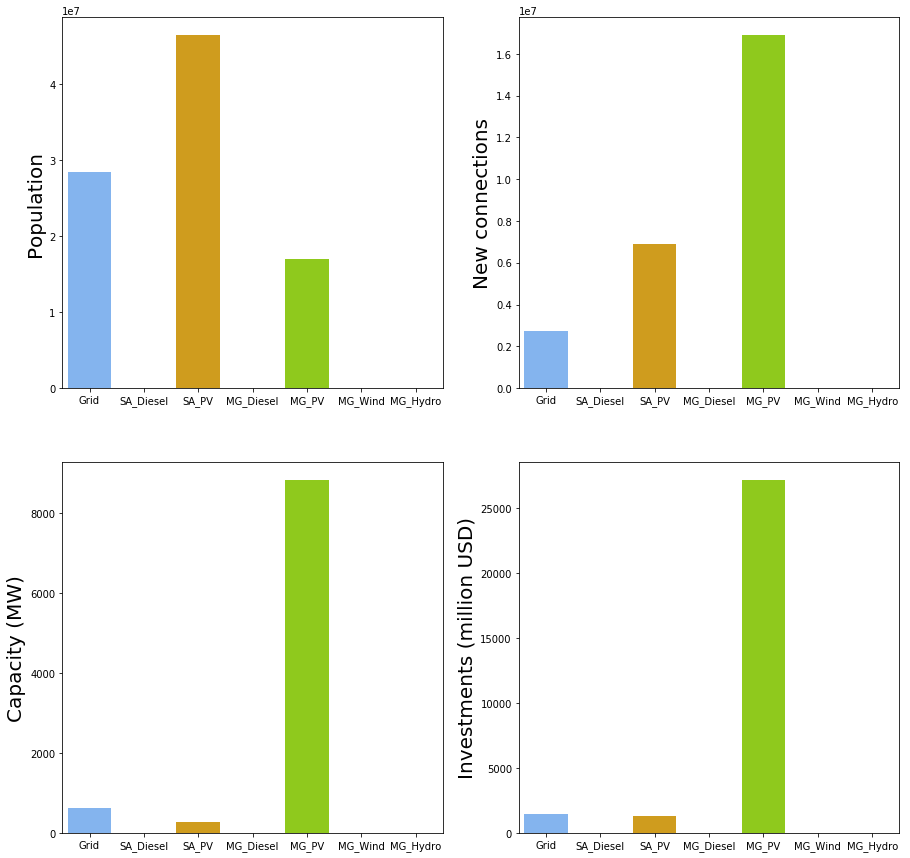

In [39]:
import matplotlib.pylab as plt
import seaborn as sns

colors = ['#73B2FF','#EDD100','#EDA800','#1F6600','#98E600','#70A800','#1FA800']
techs_colors = dict(zip(techs, colors))

summary_plot=summary_table.drop(labels='Total',axis=0)
fig_size = [15, 15]
font_size = 10
plt.rcParams["figure.figsize"] = fig_size
f, axarr = plt.subplots(2, 2)
fig_size = [15, 15]
font_size = 10
plt.rcParams["figure.figsize"] = fig_size

sns.barplot(x=summary_plot.index.tolist(), y=columns[0], data=summary_plot, ax=axarr[0, 0], palette=colors)
axarr[0, 0].set_ylabel(columns[0], fontsize=2*font_size)
axarr[0, 0].tick_params(labelsize=font_size)
sns.barplot(x=summary_plot.index.tolist(), y=columns[1], data=summary_plot, ax=axarr[0, 1], palette=colors)
axarr[0, 1].set_ylabel(columns[1], fontsize=2*font_size)
axarr[0, 1].tick_params(labelsize=font_size)
sns.barplot(x=summary_plot.index.tolist(), y=columns[2], data=summary_plot, ax=axarr[1, 0], palette=colors)
axarr[1, 0].set_ylabel(columns[2], fontsize=2*font_size)
axarr[1, 0].tick_params(labelsize=font_size)
sns.barplot(x=summary_plot.index.tolist(), y=columns[3], data=summary_plot, ax=axarr[1, 1], palette=colors)
axarr[1, 1].set_ylabel(columns[3], fontsize=2*font_size)
axarr[1, 1].tick_params(labelsize=font_size)

<Figure size 720x720 with 0 Axes>

2019-04-12 12:09:37,325		update_title_pos
2019-04-12 12:09:37,401		update_title_pos
2019-04-12 12:09:37,506		update_title_pos
2019-04-12 12:09:37,547		update_title_pos
2019-04-12 12:09:37,571		update_title_pos


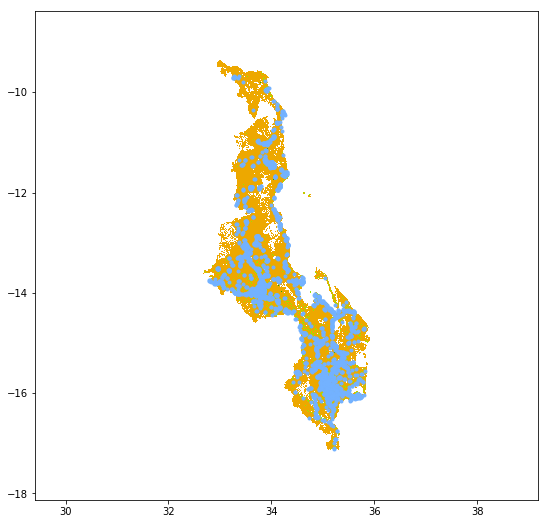

<Figure size 720x720 with 0 Axes>

In [40]:
from matplotlib import pyplot as plt
colors = ['#73B2FF','#EDD100','#EDA800','#1F6600','#98E600','#70A800','#1FA800']
plt.figure(figsize=(9,9))
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode2030']==3, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode2030']==3, SET_Y_DEG], color='#EDA800', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode2030']==2, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode2030']==2, SET_Y_DEG], color='#EDD100', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode2030']==4, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode2030']==4, SET_Y_DEG], color='#1F6600', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode2030']==5, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode2030']==5, SET_Y_DEG], color='#98E600', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode2030']==6, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode2030']==6, SET_Y_DEG], color='#70A800', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode2030']==7, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode2030']==7, SET_Y_DEG], color='#1FA800', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode2030']==1, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode2030']==1, SET_Y_DEG], color='#73B2FF', marker='.', linestyle='none')
if onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min() > onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min():
    plt.xlim(onsseter.df[SET_X_DEG].min() - 1, onsseter.df[SET_X_DEG].max() + 1)
    plt.ylim((onsseter.df[SET_Y_DEG].min()+onsseter.df[SET_Y_DEG].max())/2 - 0.5*abs(onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min()) - 1, (onsseter.df[SET_Y_DEG].min()+onsseter.df[SET_Y_DEG].max())/2 + 0.5*abs(onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min()) + 1)
else:
    plt.xlim((onsseter.df[SET_X_DEG].min()+onsseter.df[SET_X_DEG].max())/2 - 0.5*abs(onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min()) - 1, (onsseter.df[SET_X_DEG].min()+onsseter.df[SET_X_DEG].max())/2 + 0.5*abs(onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min()) + 1)
    plt.ylim(onsseter.df[SET_Y_DEG].min() -1, onsseter.df[SET_Y_DEG].max() +1)
plt.figure(figsize=(10,10))

## Exporting results

This code generates two csv files:
 - one containing all the results for the scenario created
 - one containing the summary for the scenario created


In [41]:
# Returning the result as a csv file
df.to_csv(r"Results/Results_{c}_{sc}_{gp}_{dp}.csv".format(c=country, sc=energy_per_hh_urban, gp=grid_generation_cost, dp=diesel_price), index=False)

# Returning the summary as a csv file
summary_table.to_csv(r"Results/Summary_{c}_{sc}_{gp}_{dp}.csv".format(c=country, sc=energy_per_hh_urban, gp=grid_generation_cost, dp=diesel_price), index=True)

NameError: name 'df' is not defined